# 🎹 Spotify Tracks Dataset



# Column Description:

## Identificación
- **track_id:** The Spotify ID for the track  
- **artists:** The artists' names who performed the track (if there is more than one artist, they are separated by a `;`)  
- **album_name:** The album name in which the track appears  
- **track_name:** Name of the track  

## Popularidad
- **popularity:** A value between 0 and 100, with 100 being the most popular. Popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.  

## Características de la pista
- **duration_ms:** The track length in milliseconds  
- **explicit:** Whether or not the track has explicit lyrics (`true` = yes it does; `false` = no it does not OR unknown)  
- **danceability:** Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable)  
- **energy:** A measure from 0.0 to 1.0 representing intensity and activity (e.g. death metal has high energy, Bach prelude has low energy)  
- **key:** The key the track is in (integers map to pitches using Pitch Class notation, e.g. `0 = C`, `1 = C♯/D♭`, `2 = D`, etc.)  
- **loudness:** The overall loudness of a track in decibels (dB)  
- **mode:** Modality (major or minor) of a track (`1 = Major`, `0 = Minor`)  
- **speechiness:** Detects the presence of spoken words in a track (values closer to `1.0` indicate more speech)  
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic (`1.0 = high confidence track is acoustic`)  
- **instrumentalness:** Predicts whether a track contains no vocals (closer to `1.0` indicates greater likelihood of no vocal content)  
- **liveness:** Detects the presence of an audience in the recording (`values above 0.8 indicate strong likelihood track is live`)  
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed (`high valence = happy, cheerful`, `low valence = sad, angry`)  
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM)  
- **time_signature:** Estimated time signature (`ranges from 3 to 7`, indicating time signatures of `3/4` to `7/4`)  
- **track_genre:** The genre in which the track belongs  



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv("data/raw/dataset.csv", index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [8]:
label_encoder = LabelEncoder()
df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded']

X = df[features]
y = df['popularity']

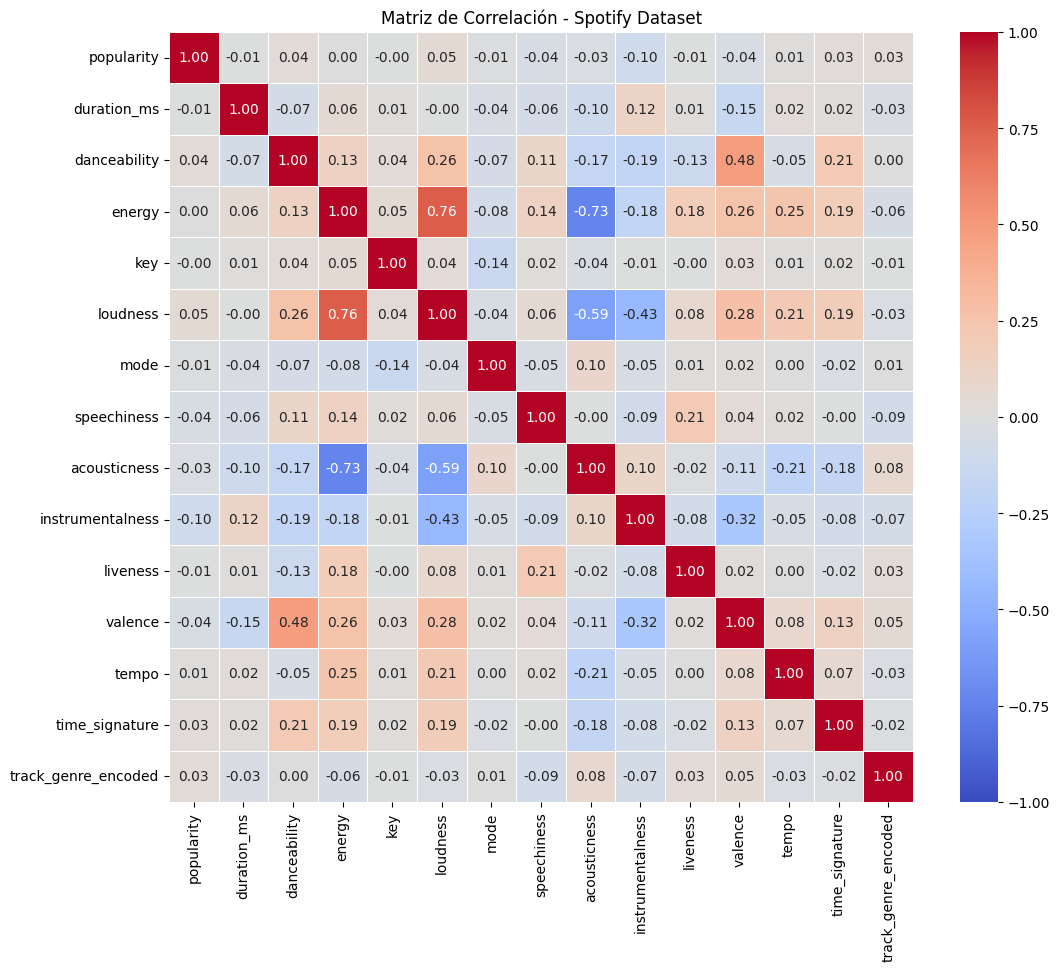

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlation_matrix = df_numeric.corr()

# Dibujamos el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1)
plt.title("Matriz de Correlación - Spotify Dataset")
plt.show()